In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
pip install Bio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO

# CPNR

In [21]:
import pandas as pd


excel_file_path = '/content/PSSP.xlsx'
data = pd.read_excel(excel_file_path)

amino_acids = {
    'A': 35, 'R': 47, 'N': 41, 'D': 59, 'C': 11,
    'Q': 29, 'E': 61, 'G': 43, 'H': 17, 'I': 53,
    'L': 23, 'K': 67, 'M': 1, 'F': 3, 'P': 7,
    'S': 31, 'T': 13, 'W': 2, 'Y': 5, 'V': 19
}

for col in data.columns:
    data[col] = data[col].apply(lambda x: amino_acids.get(x, 0))

data = data.iloc[:, :500]

output_excel_path = 'CPNR.xlsx'
data.to_excel(output_excel_path, index=False)


#  LSTM

Epoch 1/10
60/60 [==============================] - 3s 3ms/step - loss: 0.6142 - accuracy: 0.9964
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.9964
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.9964
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.9964
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.9964
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.9964
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.9964
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.9964
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.9964
Epoch 10/10
15/15 [==============================] - 0s 2ms/step
Doğruluk: 1.0
F1 Skoru: 0.0
Kesinlik: 0.0
Duyarlılık:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive s

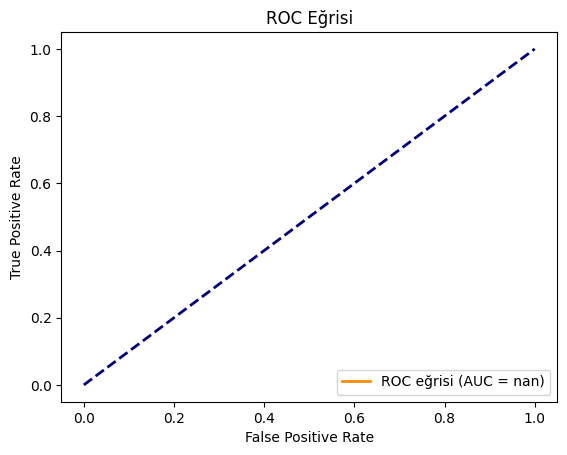

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

excel_file_path = '/content/CPNR.xlsx'
data = pd.read_excel(excel_file_path)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred_probs = model.predict(X_test)

threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print(f"F1 Skoru: {f1}")
print(f"Kesinlik: {precision}")
print(f"Duyarlılık: {recall}")
print(f"Karmaşıklık Matrisi:\n{conf_matrix}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()
